In [6]:
# Install kagglehub if not already installed
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dylanjcastillo/7k-books-with-metadata")

print("Path to dataset files:", path)
# Si copiamos ese path nos llevará a la carpeta donde se descargó el dataset

Path to dataset files: C:\Users\euscuvilca\.cache\kagglehub\datasets\dylanjcastillo\7k-books-with-metadata\versions\3


In [7]:
#Importando pandas
import pandas as pd

In [8]:
# usando pandas para leer el csv
df = pd.read_csv(path + "/books.csv")
df

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0
6806,9788185944609,8185944601,Secrets Of The Heart,NaN,Khalil Gibran,Mysticism,http://books.google.com/books/content?id=XcrVp...,NaN,1993.0,4.08,74.0,324.0
6807,9788445074879,8445074873,Fahrenheit 451,NaN,Ray Bradbury,Book burning,NaN,NaN,2004.0,3.98,186.0,5733.0
6808,9789027712059,9027712050,The Berlin Phenomenology,NaN,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0,0.00,210.0,0.0


In [9]:
# Install seaborn if not already installed
%pip install seaborn

# Importando seaborn y matplotlib
import seaborn as sns
import matplotlib.pyplot as plt


Note: you may need to restart the kernel to use updated packages.


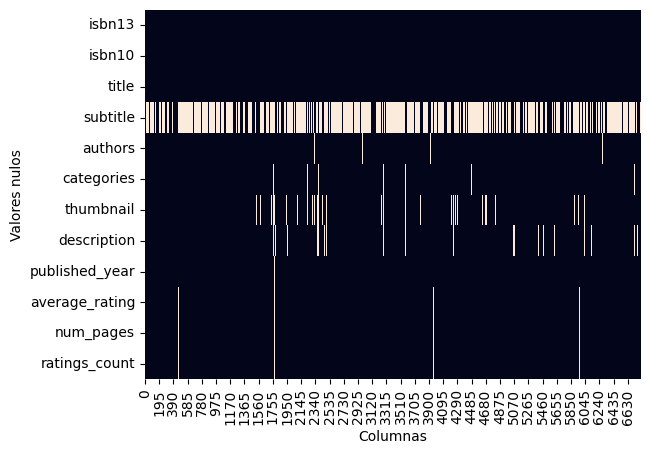

In [10]:
# Elaborando un mapa de Calor para ver un patrón o correlación entre los valores nulos en el dataset
ax = plt.axes()
sns.heatmap(df.isna().transpose(),cbar=False, ax=ax)

plt.xlabel("Columnas")
plt.ylabel("Valores nulos")

plt.show()
# Explica lo que hacen las lineas anteriores:
# 1. Importamos seaborn y matplotlib
# 2. Creamos un eje para el heatmap
# 3. Creamos el heatmap con seaborn
# 4. Agregamos etiquetas al heatmap
# 5. Mostramos el heatmap
# Y porque hace eso, que es lo que busca hacaer?
# Se busca mostrar la cantidad de valores nulos por columna en el dataset
# Y como funciona ese grafico?
# Muestra en blanco las celdas que tienen
# valores n
# De este mapa de calor podemos ver que subtitle falta en la mayoría de los libros, y que la mayoría de los libros no tienen una descripción.
# puedes explicarme como funciona el mapa de calor y que información nos da?
# El mapa de calor muestra en blanco las celdas que tienen valores nulos, y en 

# Analizando el gráfico anterior 
Podemos ver que para los 3 valores de abajo: avergae_rating, num_pages y ratings_count Hay un patrón claro, donde falta una por ejm average_rating falta tambien en las otras como num_pages y ratings_count, por lo que podemos concluir que probablemente sean de otro conjunto de datos y ese dataset no contenia todos los libros de ese dataset mas grande.

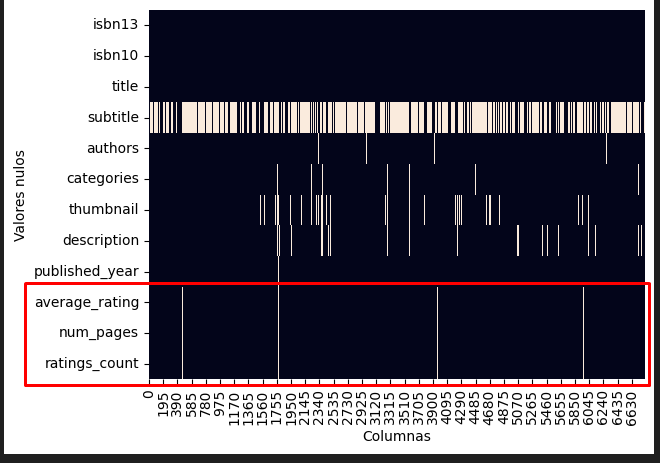

# Creando una representación numérica de los libros que le faltan Descripción


#### Vamos a buscar la relación entre los libros que les falta la descripción puede ser porque son libros mas antiguos u por otra razón.

In [11]:
import numpy as np
# Vamos a usar el metodo de desgaste numerico para ver la cantidad de valores nulos en cada columna
df["missing_description"] = np.where(df["description"].isna(), 1, 0)
# Lo que hace el codigo anterior es colocar un 0 en la columna missing_description si la columna description no tiene valores nulos, y un 1 si tiene valores nulos

# Convirtiendo la columna año del libro en una nueva columna llamada edad del libro.
df["age_of_book"] = pd.to_datetime(df["published_year"], errors="coerce")

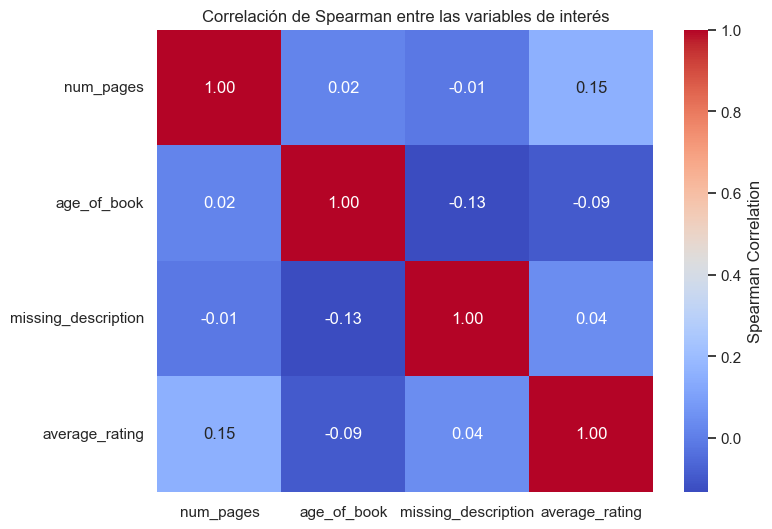

In [12]:
# Creando una lista con las columnas que nos interesan
columns_of_interest = ["num_pages", "age_of_book", "missing_description", "average_rating"]

# Creando ahora una matriz de correlación directamente del marco de pandas usando solo esas columnas 
# Se está usando la correlación de spearman en lugar de la correlación de Pearson porque la correlación de Pearson asume que las variables 
# son normalmente distribuidas, lo cual no es el caso para la mayoría de las variables en este conjunto de datos. En este dataset, las variables
# son continuas y no necesariamente normalmente distribuidas, por lo que la correlación de Spearman es más adecuada. 
# Una variable Continua es una variable que puede tomar cualquier valor dentro de un rango determinado, mientras que una variable normalmente distribuida
# es una variable que tiene una distribución normal, es decir, una distribución en forma de campana. 
# Un ejemplo de una variable continua es la edad, mientras que un ejemplo de una variable normalmente distribuida es la altura. Esto es porque la edad puede
# tomar cualquier valor dentro de un rango determinado, mientras que la altura puede tomar cualquier valor dentro de un rango determinado y tiene una distribución
# en forma de campana.
correlation_matrix = df[columns_of_interest].corr(method="spearman")
# Convirtiendo la matriz de correlación en un mapa de calor
sns.set_theme(style="white")
plt.figure(figsize=(8, 6))
# Pasando la matriz de correlación a un mapa de calor
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={"label": "Spearman Correlation"})
heatmap.set_title("Correlación de Spearman entre las variables de interés")
plt.show()

In [ ]:
# Lo que hace el codigo anterior es buscar en el dataframe df los libros que 
# tengan valores nulos en la columna description, num_pages, average_rating o published_year
df[(df["description"].isna())|
   (df["num_pages"].isna())|
   (df["average_rating"].isna())|
   (df["published_year"].isna())  
   ]

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book
37,9780006906018,000690601X,The Princess of the Chalet School,NaN,Elinor Mary Brent-Dyer,Juvenile Fiction,http://books.google.com/books/content?id=EJcQP...,NaN,2000.0,4.10,159.0,446.0,1,1970-01-01 00:00:00.000002000
60,9780007127740,000712774X,The illustrated man,NaN,Ray Bradbury,Fiction,http://books.google.com/books/content?id=kePql...,NaN,2002.0,4.14,186.0,56781.0,1,1970-01-01 00:00:00.000002002
99,9780020442806,0020442807,"The Chronicles of Narnia: Lion, the witch and ...",NaN,Clive Staples Lewis,Fairy tales,NaN,NaN,1978.0,4.26,1425.0,1446.0,1,1970-01-01 00:00:00.000001978
102,9780023513206,0023513209,Reason in History,A General Introduction to the Philosophy of Hi...,Georg Wilhelm Friedrich Hegel,Philosophy,http://books.google.com/books/content?id=BCvcY...,NaN,1953.0,3.64,95.0,430.0,1,1970-01-01 00:00:00.000001953
105,9780026995016,0026995018,Spandau,The Secret Diaries,Albert Speer,History,NaN,NaN,1976.0,4.12,463.0,6.0,1,1970-01-01 00:00:00.000001976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6787,9783464371640,3464371646,About a Boy,NaN,Nick Hornby,NaN,http://books.google.com/books/content?id=PuDYw...,NaN,2002.0,3.80,256.0,155.0,1,1970-01-01 00:00:00.000002002
6788,9783540292128,3540292128,Enzyme-Catalyzed Synthesis of Polymers,NaN,Shiro Kobayashi;Helmut Ritter;David Kaplan,Science,http://books.google.com/books/content?id=WXOym...,NaN,2006.0,0.00,254.0,0.0,1,1970-01-01 00:00:00.000002006
6798,9787506435673,7506435675,Good Fight,NaN,Judd Winick;Matthew Clark,Juvenile Fiction,http://books.google.com/books/content?id=xGPZA...,Presents the adventures of a new group of hero...,2007.0,NaN,NaN,NaN,0,1970-01-01 00:00:00.000002007
6806,9788185944609,8185944601,Secrets Of The Heart,NaN,Khalil Gibran,Mysticism,http://books.google.com/books/content?id=XcrVp...,NaN,1993.0,4.08,74.0,324.0,1,1970-01-01 00:00:00.000001993


### Del la ejecución del cogo anterior podemos ver que hay 303 registros 
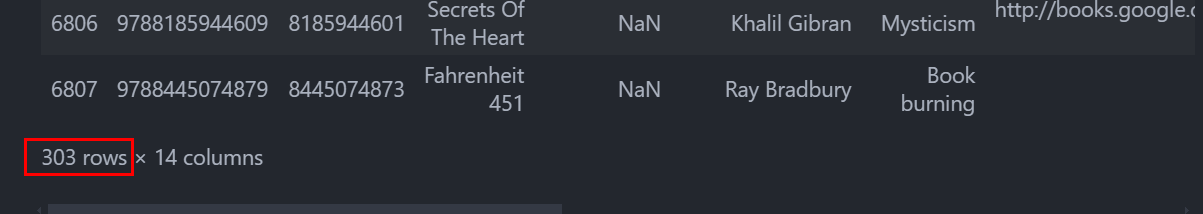
Esto es aproximandamente menos del 5% por lo que podemos trabajar sin estos registros tranquilamente.

In [14]:
# Creando un nuevo dataset llamado book_missing negando el dataset anterior
book_missing = df[~((df["description"].isna())|
   (df["num_pages"].isna())|
   (df["average_rating"].isna())|
   (df["published_year"].isna()))]


In [ ]:
# Obtenemos un nuevo dataset con todos los valores completos
book_missing

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,1970-01-01 00:00:00.000002004
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,1970-01-01 00:00:00.000002000
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0,0,1970-01-01 00:00:00.000001982
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,1970-01-01 00:00:00.000001993
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,1970-01-01 00:00:00.000002002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,1970-01-01 00:00:00.000002002
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,1970-01-01 00:00:00.000002003
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,1970-01-01 00:00:00.000001999
6808,9789027712059,9027712050,The Berlin Phenomenology,NaN,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0,0.00,210.0,0.0,0,1970-01-01 00:00:00.000001981


In [ ]:
# Lo siguiente a realizar es reducir la cantidad de Categorias que hay 
# Obteniendo la cantidad de libros que hay en cada categoria, y se ordenan de mayor a menor
book_missing["categories"].value_counts().reset_index().sort_values("count",ascending=False)
# De los resultados se puede obtener que hay una desigual distribucion de categorias,
# siendo Fiction la mas popular, luego le sigue Juvenile y de ahi le siguen una gran variedad
# de categorias las cuales van a tener que ser reclasificadas y para ellos se usará LLM
# en especifico text clasification.

,categories,count
0,Fiction,2523
1,Juvenile Fiction,534
2,Biography & Autobiography,391
3,History,258
4,Literary Criticism,164
...,...,...
519,Aeronautics,1
518,Childbirth,1
517,Consumer behavior,1
516,Seduction,1


Si buscamos ahora en la columna de 'Description' vemos que algunos libros no tienen una descripción coherente, por lo que tambien esos casos no son utiles.
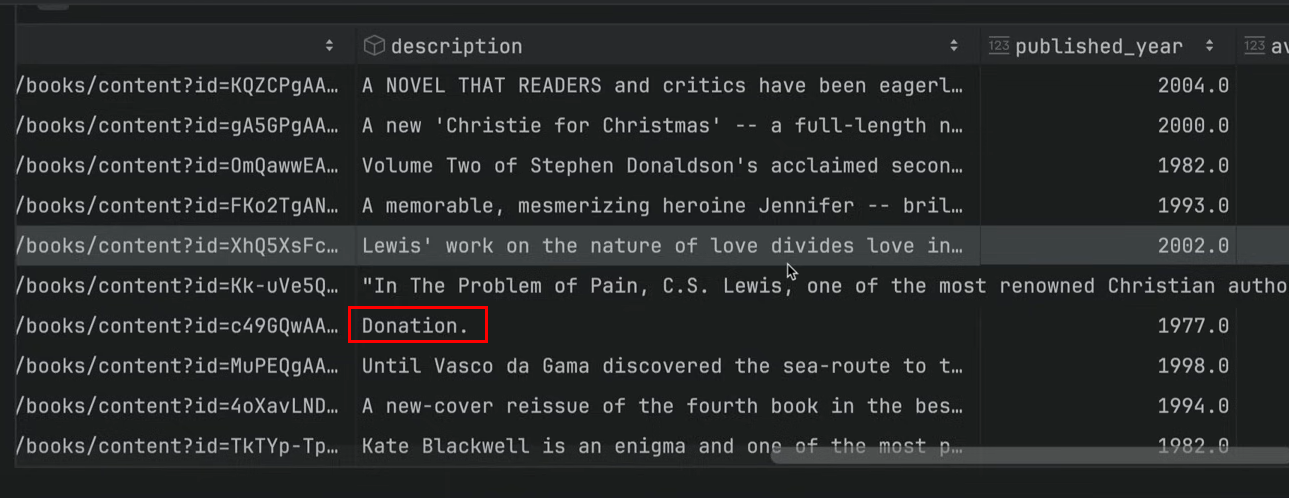

In [17]:
# Vamos a crear para ello una columna words in description y poner ahi la cantidad de
# palabras que tienen
book_missing["words_in_description"] = book_missing["description"].str.split().str.len()

C:\Users\euscuvilca\AppData\Local\Temp\ipykernel_97736\2104811568.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_missing["words_in_description"] = book_missing["description"].str.split().str.len()


In [18]:
book_missing

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_description
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,1970-01-01 00:00:00.000002004,199
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,1970-01-01 00:00:00.000002000,205
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0,0,1970-01-01 00:00:00.000001982,14
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,1970-01-01 00:00:00.000001993,57
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,1970-01-01 00:00:00.000002002,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,1970-01-01 00:00:00.000002002,63
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,1970-01-01 00:00:00.000002003,117
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,1970-01-01 00:00:00.000001999,174
6808,9789027712059,9027712050,The Berlin Phenomenology,NaN,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0,0.00,210.0,0.0,0,1970-01-01 00:00:00.000001981,245
